In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_df = pd.read_table("train.tsv")
train_df = shuffle(train_df)
print(train_df.shape)
train_df.head(5)

(150211, 13)


,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
62740,68,RL,90,11700,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,3,184300
142799,29,RL,77,8335,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,3,94000
91328,82,RL,85,13400,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,3,162150
55792,191,RM,65,7800,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,3,129200
86943,67,RL,107,13891,Facing Road,Urban,Only WIthdraw,Normal,Petrol Bunk,4,Working,5,587333


In [3]:
test_df = pd.read_table("test.tsv")
print(test_df.shape)
test_df.head(5)

(2836, 13)


,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
0,81,RL,101,9150,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,3,172600
1,30,RL,78,7800,Facing Road,Urban,Only WIthdraw,Normal,Building,2,Working,3,133100
2,24,RL,87,9830,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,4,171700
3,66,RL,51,8121,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,3,176700
4,57,RL,80,17120,Facing Road,Urban,Only WIthdraw,Normal,Building,4,Working,3,138332


In [4]:
object_fea = train_df.select_dtypes(include=['object']).columns.tolist()
object_fea

['ATM_Zone',
 'ATM_Placement',
 'ATM_TYPE',
 'ATM_Location_TYPE',
 'ATM_looks',
 'ATM_Attached_to',
 'Day_Type']

In [5]:
ordinal_encoder = OrdinalEncoder()
train_df[object_fea] = ordinal_encoder.fit_transform(train_df[object_fea]).astype(int)
train_df.head(5)

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
62740,68,3,90,11700,0,3,2,1,0,3,3,3,184300
142799,29,3,77,8335,0,3,2,1,0,3,3,3,94000
91328,82,3,85,13400,0,3,2,1,0,3,3,3,162150
55792,191,4,65,7800,0,3,2,1,0,3,3,3,129200
86943,67,3,107,13891,0,3,2,1,3,4,3,5,587333


In [6]:
test_df[object_fea] = ordinal_encoder.transform(test_df[object_fea]).astype(int)

In [7]:
test_df.head(5)

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
0,81,3,101,9150,0,2,2,1,0,3,3,3,172600
1,30,3,78,7800,0,3,2,1,0,2,3,3,133100
2,24,3,87,9830,0,2,2,1,0,3,3,4,171700
3,66,3,51,8121,0,2,2,1,0,3,3,3,176700
4,57,3,80,17120,0,3,2,1,0,4,3,3,138332


In [8]:
y2 = train_df['rating'].values
y2[:5]

array([3, 3, 3, 3, 5], dtype=int64)

In [9]:
x2 = train_df.drop('rating', axis=1).values
x2[:5]

array([[    68,      3,     90,  11700,      0,      3,      2,      1,
             0,      3,      3, 184300],
       [    29,      3,     77,   8335,      0,      3,      2,      1,
             0,      3,      3,  94000],
       [    82,      3,     85,  13400,      0,      3,      2,      1,
             0,      3,      3, 162150],
       [   191,      4,     65,   7800,      0,      3,      2,      1,
             0,      3,      3, 129200],
       [    67,      3,    107,  13891,      0,      3,      2,      1,
             3,      4,      3, 587333]], dtype=int64)

In [10]:
y_test2 = test_df['rating'].values
y_test2[:5]

array([3, 3, 4, 3, 3], dtype=int64)

In [11]:
x_test2 = test_df.drop('rating', axis=1).values
x_test2[:5]

array([[    81,      3,    101,   9150,      0,      2,      2,      1,
             0,      3,      3, 172600],
       [    30,      3,     78,   7800,      0,      3,      2,      1,
             0,      2,      3, 133100],
       [    24,      3,     87,   9830,      0,      2,      2,      1,
             0,      3,      3, 171700],
       [    66,      3,     51,   8121,      0,      2,      2,      1,
             0,      3,      3, 176700],
       [    57,      3,     80,  17120,      0,      3,      2,      1,
             0,      4,      3, 138332]], dtype=int64)

In [12]:
split_percentage = 0.8
split_point = int(len(x2) * split_percentage)

x_train2 = x2[:split_point]
x_val2 = x2[split_point:]
y_train2 = y2[:split_point]
y_val2 = y2[split_point:]

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

def rmsle(Y, Y_pred):
    assert Y.shape == Y_pred.shape
    return np.sqrt(np.mean(np.square(Y_pred - Y)))

def run_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    
    ypre = model.predict(X_val)
    
    mse = mean_squared_error(y_val, ypre)
    r_sq = r2_score(y_val, ypre)
    rmlse_1 = rmsle(y_val, ypre)
    
    print("Mean Squared Error Value : "+"{:.2f}".format(mse))
    print("\nR-Squared Value : "+"{:.2f}".format(r_sq))
    print("\nRMLSE : "+"{:.2f}".format(rmlse_1))
    return model, mse, r_sq, rmlse_1

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
print("RandomForest Regression")
print("---------------------------------------")
model_5, mse_4, r_sq_4, rmlse_4 = run_model(rf_reg,x_train2, y_train2, x_val2, y_val2)

RandomForest Regression
---------------------------------------
Mean Squared Error Value : 0.00

R-Squared Value : 1.00

RMLSE : 0.02


In [15]:
y_pred_classify = model_5.predict(x_test2)

In [16]:
y_pred_classify[:10]

array([3., 3., 4., 3., 3., 3., 3., 4., 2., 3.])

In [17]:
y_test2[:10]

array([3, 3, 4, 3, 3, 3, 3, 4, 2, 3], dtype=int64)

In [18]:
# 假设你有一个包含真实值和预测值的 DataFrame
results_df = pd.DataFrame({'true_values': y_test2, 'predicted_values': y_pred_classify})

# 计算真实值和预测值之间的相关性
correlation = results_df['true_values'].corr(results_df['predicted_values'])
correlation

0.999587362049908

In [19]:
error_count = 0
for i in range(len(y_test2)):
    if y_test2[i]!=y_pred_classify[i]:
        error_count+=1
error_count

83

In [20]:
error_count/len(y_test2)

0.02926657263751763

In [28]:
# 获取特征重要性
feature_names = train_df.drop('rati', axis=1).columns.tolist()
feature_importances = model_5.feature_importances_

# 打印特征重要性
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

Number_of_Shops_Around_ATM: 0.0452189209355381
ATM_Zone: 0.02283870313003849
No_of_Other_ATMs_in_1_KM_radius: 0.10938503784515818
Estimated_Number_of_Houses_in_1_KM_Radius: 0.19466261080297062
ATM_Placement: 0.00020422999543818143
ATM_TYPE: 0.016657673446236847
ATM_Location_TYPE: 0.014649141195393369
ATM_looks: 0.011059901491640958
ATM_Attached_to: 0.01992949733941776
Average_Wait_Time: 0.03923216215702446
Day_Type: 0.005292432665665993
rating: 0.5208696889954771


In [31]:
feature_names = train_df.drop('rating', axis=1).drop('revenue', axis=1).columns.tolist()
feature_importances = model_5.feature_importances_

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (12,) and arg 3 with shape (11,).

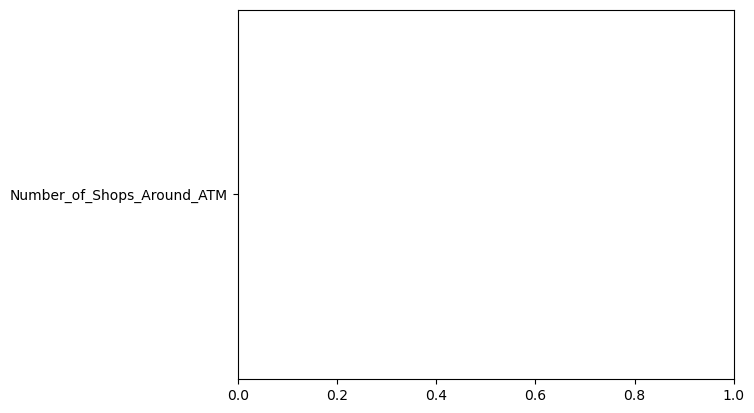

In [32]:
import matplotlib.pyplot as plt

# 绘制特征重要性条形图
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [24]:
# from sklearn.svm import SVC

# clf = SVC(kernel='rbf', random_state=42)
# print("SVC Classify")
# print("---------------------------------------")
# model_6, mse_4, r_sq_4, rmlse_4 = run_model(clf,x_train2, y_train2, x_val2, y_val2)

In [25]:
# y_pred_classify2 = model_6.predict(x_test2)
# y_pred_classify[:10]

In [26]:
# # 假设你有一个包含真实值和预测值的 DataFrame
# results_df2 = pd.DataFrame({'true_values': y_test2, 'predicted_values': y_pred_classify2})

# # 计算真实值和预测值之间的相关性
# correlation2 = results_df2['true_values'].corr(results_df2['predicted_values'])
# correlation2